In [1]:
#Part 1: Running pretrained image-recognition model: ResNet

In [2]:
from torchvision import models

In [3]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [4]:
resnet = models.resnet101(weights = models.ResNet101_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:02<00:00, 60.9MB/s] 


In [11]:
from torchvision import transforms

In [12]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In [7]:
from PIL import Image
img = Image.open('mountain_tent.JPG')

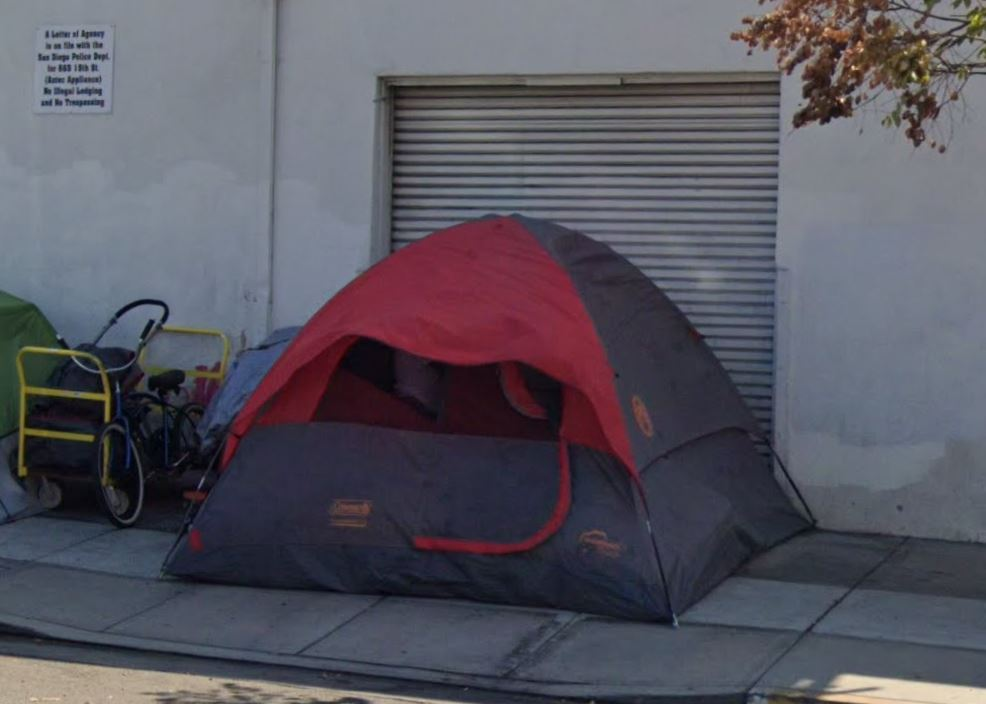

In [8]:
img

In [9]:
img.size

(986, 704)

In [13]:
img_t = preprocess(img)

In [17]:
#img_t
#img_t.shape
#img_t.size

In [18]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
batch_t.shape
#return batch size, dimension, photo size (224, 224)

torch.Size([1, 3, 224, 224])

In [19]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
out = resnet(batch_t)

In [21]:
out

tensor([[ 3.0307e-01,  3.6364e-02, -1.6839e-01, -2.4168e-01, -2.2910e-01,
          6.0634e-03, -3.7531e-01,  1.6277e-01, -1.0612e-01,  6.6283e-02,
         -5.9485e-02, -2.4614e-02,  5.7244e-06,  9.9465e-02, -2.0065e-01,
         -1.6769e-01, -7.5095e-02, -6.2801e-02,  3.3405e-03, -5.7481e-05,
          5.2753e-02, -2.2287e-01, -2.6492e-01, -1.3451e-01, -1.3593e-01,
          6.1121e-02, -1.7819e-01, -2.1791e-01, -1.3754e-01,  1.8142e-01,
         -1.4145e-01, -3.0714e-01,  1.0526e-01,  1.5029e-01,  3.6918e-02,
          1.1015e-02, -4.6962e-02, -7.4355e-02, -9.7086e-02, -1.1815e-01,
         -1.3096e-02,  1.2100e-01,  2.4558e-02, -1.8634e-01, -3.3293e-02,
          9.6274e-02,  2.8293e-01,  5.6956e-02, -1.0347e-01, -1.1367e-01,
          1.4720e-02,  2.1149e-02, -5.8818e-02,  4.5509e-02,  1.6588e-01,
         -1.0442e-01,  8.9457e-01, -1.2612e-01, -4.7361e-02, -3.1177e-01,
          4.8701e-01, -4.9139e-02, -4.3136e-01, -1.5318e-01,  1.4789e-02,
         -1.5232e-01,  3.2034e-02, -1.

In [41]:
len(out[0])

1000

In [23]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [24]:
out.argmax()

tensor(672)

In [26]:
labels[672]

'mountain tent'

In [27]:
_, index = torch.max(out, 1)

In [28]:
_, index

(tensor([7.9002], grad_fn=<MaxBackward0>), tensor([672]))

In [29]:
percentage = torch.nn.functional.softmax(out, dim = 1)[0] * 100

In [30]:
labels[index[0]], percentage[index[0]].item()

('mountain tent', 71.80799865722656)

In [31]:
_, indices = torch.sort(out, descending = True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('mountain tent', 71.80799865722656),
 ('sleeping bag', 0.5760356783866882),
 ('dome', 0.24994756281375885),
 ('umbrella', 0.1840275228023529),
 ('backpack, back pack, knapsack, packsack, rucksack, haversack',
  0.13379409909248352)]